In [1]:
from PIL import Image
import os
import numpy as np
from matplotlib import pyplot as plt

In [179]:
from skimage.measure import label,regionprops
from skimage.segmentation import watershed
from skimage.exposure import histogram
from skimage.feature import peak_local_max
from skimage.morphology import remove_small_objects
from scipy import ndimage as ndi
from skimage.filters import sobel

In [3]:
imsrc = r'\\motherserverdw\Kyu_Sync\Research\Database\Micropattern_MEF_LMNA_Image-master\Control\LMNA++1'
imlist = [_ for _ in os.listdir(imsrc) if _.endswith('tif') and 'c2' in _]
impaths = [os.path.join(imsrc,_) for _ in os.listdir(imsrc) if _.endswith('tif') and 'c2' in _]

In [24]:
im = Image.open(impaths[0])
imarr16 = np.array(im)
imarr8 = (imarr16/256).astype('uint8') #convert 16bit to 8bit if needed

np.min(imarr8),np.median(imarr8),np.max(imarr8),np.min(imarr16),np.median(imarr16),np.max(imarr16)

(0, 0.0, 2, 100, 116.0, 536)

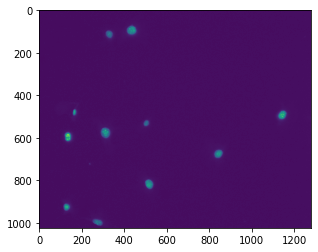

In [10]:
plt.imshow(imarr16)

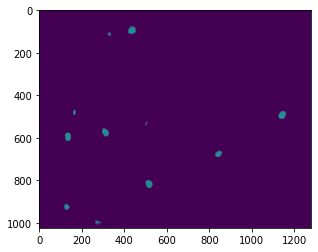

In [11]:
plt.imshow(imarr8)

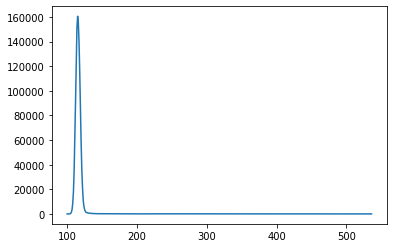

In [27]:
hist, hist_centers = histogram(imarr16)
plt.plot(hist_centers,hist)

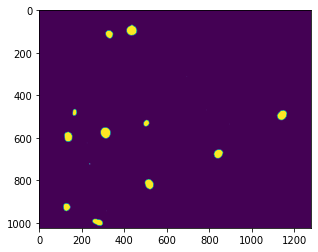

In [33]:
# Method 1: simple manual thresholding
mask = np.zeros(imarr16.shape)
mask[imarr16>150]=1
plt.imshow(mask)

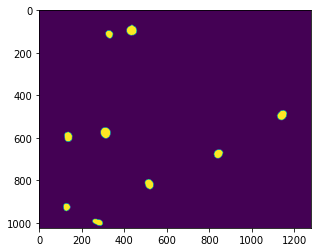

In [42]:
# Method 1: simple manual thresholding
mask2 = remove_small_objects(mask.astype('bool'),min_size=800)
plt.imshow(mask2)

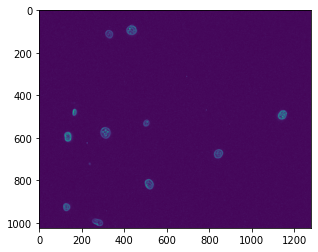

In [44]:
# Method 2: elevation-based segmentation useful when histogram has 2+ peaks (i.e. brightfield)
elevation_map = sobel(imarr16)
plt.imshow(elevation_map)

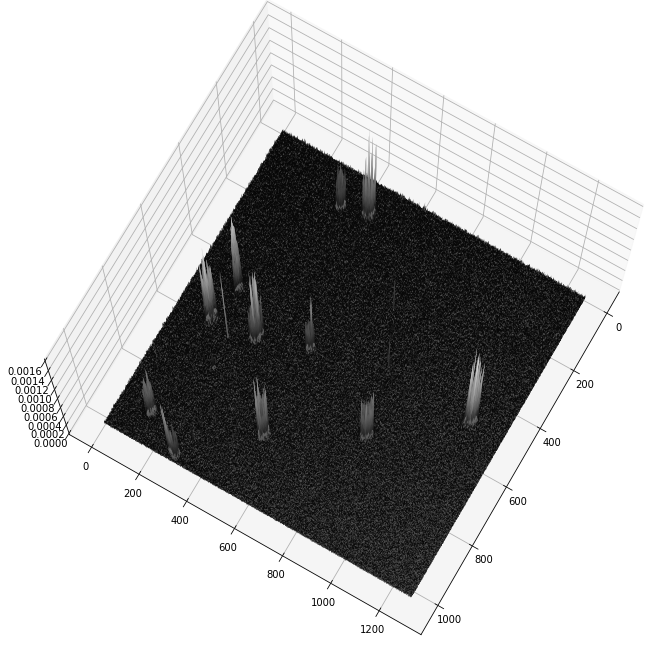

In [66]:
fig, ax = plt.subplots(figsize=(12,12),subplot_kw={"projection": "3d"})
xx,yy = np.mgrid[0:elevation_map.shape[0],0:elevation_map.shape[1]]
ax.plot_surface(xx, yy, elevation_map ,rstride=1, cstride=1, cmap=plt.cm.gray,
        linewidth=0)

ax.view_init(75, 30)

array([1, 2])

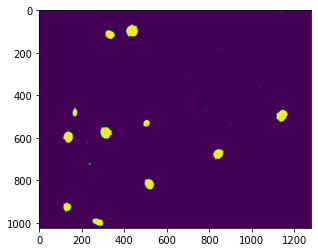

In [131]:
mask3 = np.zeros(imarr16.shape)
mask3[imarr16<np.median(imarr16)-10]=1
mask3[np.median(imarr16)+20<imarr16]=2
mask4=watershed(elevation_map,mask3)
plt.imshow(mask4)
np.unique(mask4)

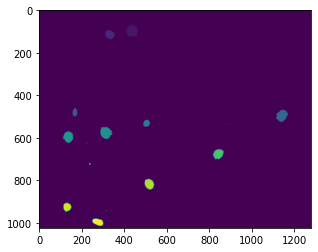

In [133]:
iml = label(mask4)
plt.imshow(iml)

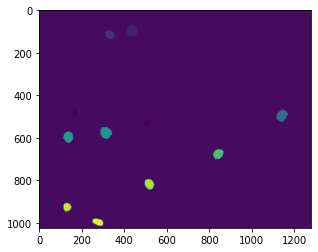

In [177]:
iml2 = remove_small_objects(iml,min_size=800)
plt.imshow(iml2)

In [189]:
props = regionprops(iml2)
x,y=np.around(props[1].centroid).astype('int')
rad=30

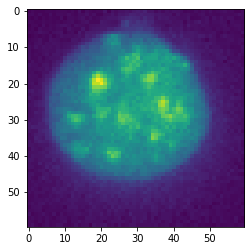

In [190]:
crop = imarr16[x-rad:x+rad,y-rad:y+rad]
plt.imshow(crop)